In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
#from keras_layer_normalization import LayerNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
#from tensorflow.keras.layers import LayerNormalization

# supress deprecation warnings from TF
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
train_set=read_csv('data/train_set.csv')
val_set=read_csv('data/val_set.csv')
test_set=read_csv('data/test_set.csv')

In [3]:
trainy=read_csv('data/trainy.csv')
valy=read_csv('data/valy.csv')
testy=read_csv('data/testy.csv')

In [4]:
df = read_csv('data/orginal_data.csv')

In [5]:
# make the range between 0 and 1
column = list(train_set.columns.values)
for col in column:
    minimum = df[col].min()
    maximum = df[col].max()
    train_set[col] = (train_set[col] - minimum)/(maximum-minimum)
    val_set[col] = (val_set[col] - minimum)/(maximum-minimum)
    test_set[col] = (test_set[col] - minimum)/(maximum-minimum)

In [18]:
train_set_cnn = train_set.values
val_set_cnn = val_set.values
test_set_cnn = test_set.values

In [19]:
train_set_cnn = np.reshape(train_set_cnn, (train_set_cnn.shape[0],train_set_cnn.shape[1],1))
val_set_cnn = np.reshape(val_set_cnn, (val_set_cnn.shape[0],val_set_cnn.shape[1],1))
test_set_cnn = np.reshape(test_set_cnn, (test_set_cnn.shape[0],test_set_cnn.shape[1],1))

In [6]:
train_set.shape[1]

25

In [9]:
from tensorflow.keras.models import model_from_json
import tensorflow
keras_model_weights = "final_model/keras2_dnn.h5"
keras_model_json = "final_model/keras2_dnn.json"

dnn_model = model_from_json(open(keras_model_json).read())
dnn_model = tensorflow.keras.models.load_model(keras_model_weights)
dnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                1664      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
Total params: 141,825
Trainable params: 141,825
Non-trainable params: 0
________________________________________________

In [17]:
keras_model_weights = "final_model/keras2_conv1d.h5"
keras_model_json = "final_model/keras2_conv1d.json"

keras_model = model_from_json(open(keras_model_json).read())
keras_model = tensorflow.keras.models.load_model(keras_model_weights)
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 25, 64)            128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 25, 128)           8320      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 25, 256)           33024     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 25, 256)           65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 256)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [35]:
##### DNN model input_shape = (25,)
ann_model1 = Sequential()
ann_model1.add(Dense(64, input_shape=(train_set.shape[1],), kernel_regularizer=l1(0.001), activation='relu'))
ann_model1.add(Dense(128, kernel_regularizer=l1(0.001), activation='relu'))
ann_model1.add(Dense(256, kernel_regularizer=l1(0.001), activation='relu'))
ann_model1.add(Dense(256, kernel_regularizer=l1(0.001), activation='relu'))
ann_model1.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))

ann_model1.add(Dense(1, activation='sigmoid'))

def schedule(epoch):
    if epoch<=10:
        return 1e-2
    elif epoch<= 20:
        return 1e-3
    elif epoch<=40:
        return 1e-4
    else:
        return 1e-5

lr_schedule= LearningRateScheduler(schedule)
class_weight = {0: 3.,
                1: 1.}

ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = ann_model1.fit(train_set, trainy, validation_data=(val_set, valy), epochs=50, batch_size=128, 
                    shuffle=True, callbacks=[lr_schedule], class_weight=class_weight, verbose=1)

Train on 175976 samples, validate on 24531 samples
Epoch 1/50
175976/175976 [==============================] - 3s 16us/sample - loss: 0.8956 - acc: 0.8152 - val_loss: 0.6385 - val_acc: 0.7941
Epoch 2/50
175976/175976 [==============================] - 2s 14us/sample - loss: 0.7679 - acc: 0.8410 - val_loss: 0.4952 - val_acc: 0.8969
Epoch 3/50
175976/175976 [==============================] - 2s 14us/sample - loss: 0.7474 - acc: 0.8536 - val_loss: 0.4688 - val_acc: 0.9143
Epoch 4/50
175976/175976 [==============================] - 2s 14us/sample - loss: 0.7414 - acc: 0.8569 - val_loss: 0.5609 - val_acc: 0.8568
Epoch 5/50
175976/175976 [==============================] - 2s 14us/sample - loss: 0.7373 - acc: 0.8600 - val_loss: 0.5748 - val_acc: 0.8568
Epoch 6/50
175976/175976 [==============================] - 2s 14us/sample - loss: 0.7322 - acc: 0.8637 - val_loss: 0.5412 - val_acc: 0.8682
Epoch 7/50
175976/175976 [==============================] - 2s 14us/sample - loss: 0.7325 - acc: 0.8639

In [36]:
ann_model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                1664      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
Total params: 141,825
Trainable params: 141,825
Non-trainable params: 0
________________________________________________

In [38]:
# evaluate model
_, accuracy_test1 = ann_model1.evaluate(test_set, testy, batch_size=128, verbose=1)

19584/19584 [==============================] - 0s 6us/sample - loss: 0.3616 - acc: 0.8707


In [55]:
_, accuracy_test1 = ann_model1.evaluate(val_set, valy, batch_size=128, verbose=1) 

24531/24531 [==============================] - 0s 11us/sample - loss: 0.3695 - acc: 0.8716


In [56]:
_, accuracy_test1 = ann_model1.evaluate(train_set, trainy, batch_size=128, verbose=1) 

175976/175976 [==============================] - 2s 14us/sample - loss: 0.3485 - acc: 0.8882


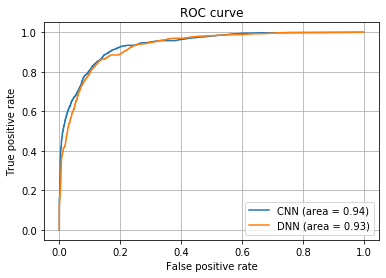

In [23]:
#import glob
import matplotlib.pyplot as plt
#import cv2
import pandas as pd

import numpy as np
from sklearn.metrics import roc_curve, auc

#import models
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


y_pred_test = dnn_model.predict(test_set)
y_pred_test = y_pred_test.ravel()
y_true_test = testy.values.ravel()
fpr_test, tpr_test, thresholds_test = roc_curve(y_true_test, y_pred_test)
auc_test = auc(fpr_test, tpr_test)


y_pred_val = keras_model.predict(test_set_cnn)
y_pred_val = y_pred_val.ravel()
y_true_val = testy.values.ravel()
fpr_val, tpr_val, thresholds_val = roc_curve(y_true_val, y_pred_val)
auc_val = auc(fpr_val, tpr_val)



plt.plot(fpr_val, tpr_val, label= 'CNN (area = {:.2f})'.format(auc_val))
plt.plot(fpr_test, tpr_test, label= 'DNN (area = {:.2f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.grid()
plt.legend(loc='best')
plt.show()


In [24]:
_, accuracy_test = keras_model.evaluate(test_set_cnn, testy, batch_size=128, verbose=1)

19584/19584 [==============================] - 1s 42us/sample - loss: 0.3456 - acc: 0.8648


In [26]:
_, accuracy_dnn = dnn_model.evaluate(test_set, testy, batch_size=128, verbose=1)

19584/19584 [==============================] - 0s 8us/sample - loss: 0.3616 - acc: 0.8707


In [25]:
dnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                1664      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
Total params: 141,825
Trainable params: 141,825
Non-trainable params: 0
________________________________________________

In [18]:
print(classification_report(testy, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.84      0.71      5051
         1.0       0.94      0.81      0.87     14533

    accuracy                           0.82     19584
   macro avg       0.77      0.83      0.79     19584
weighted avg       0.85      0.82      0.83     19584



In [20]:
print(classification_report(valy, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.58      0.92      0.71      6001
         1.0       0.97      0.78      0.86     18530

    accuracy                           0.81     24531
   macro avg       0.77      0.85      0.79     24531
weighted avg       0.87      0.81      0.83     24531

